In [53]:
salary=[11,40,45,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,140]

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [55]:
#five point summary
np.quantile(salary,[0,0.25,.50,.75,1])

array([ 11.  ,  57.  ,  75.5 ,  91.25, 140.  ])

In [56]:
df=pd.DataFrame(salary,columns=['salary'])

In [57]:
df

,salary
0,11
1,40
2,45
3,68
4,78
5,90
6,57
7,74
8,91
9,92


In [58]:
df.describe()

,salary
count,20.000000
mean,75.100000
std,28.469559
min,11.000000
25%,57.000000
50%,75.500000
75%,91.250000
max,140.000000


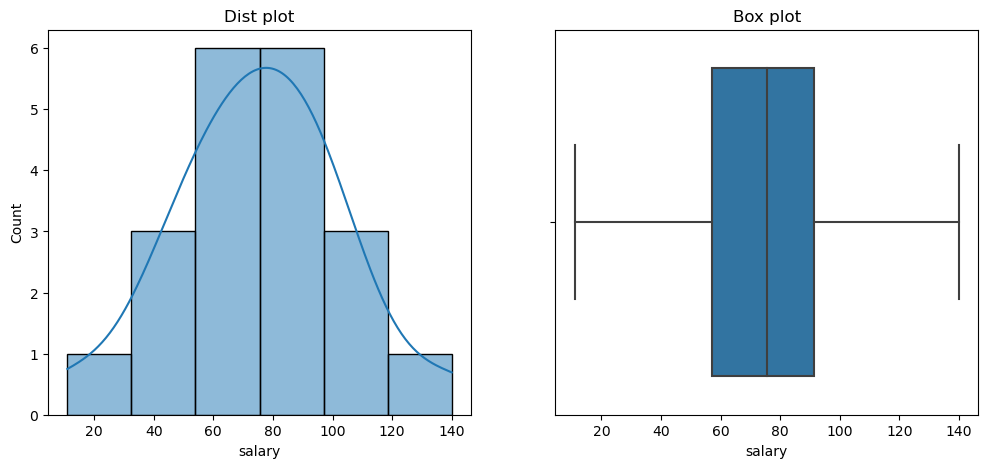

In [59]:
#To check outliers >> distplot , boxplot

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'],kde= True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary')
plt.title("Box plot")
plt.show()

In [60]:
# DDropping the Outlier
#capping the outlier
#replace with mean and median 
#scaling and transformation

In [61]:
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)


In [62]:
Q1

57.0

In [63]:
Q3

91.25

In [64]:
IQR= Q3-Q1
IQR

34.25

In [65]:
lower_fence=Q1-1.5*IQR
upper_fence=Q1+1.5*IQR

In [66]:
lower_fence


5.625

In [67]:
upper_fence

108.375

In [68]:
df.shape

(20, 1)

In [69]:
#Dropping the Outlier

In [70]:
df_filtered=df[(df.salary >=lower_fence) & (df.salary<=upper_fence)]

In [71]:
df_filtered.shape

(18, 1)

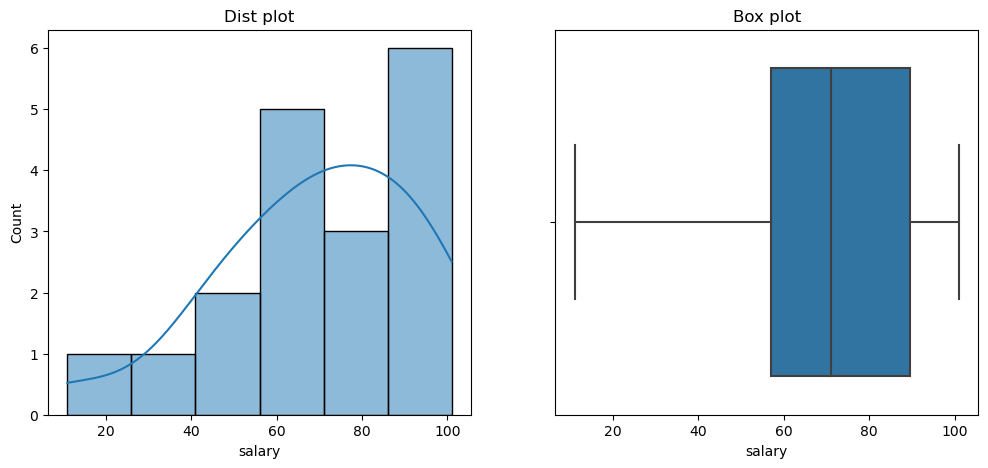

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'],kde= True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data=df_filtered,x='salary')
plt.title("Box plot")
plt.show()

In [73]:
#replace the Outlier with mean and median 

In [74]:
df['salary_mean_imputed']=np.where((df.salary >=upper_fence)| (df.salary<=lower_fence),df['salary'].mean(),df['salary'])

In [75]:
df['salary_mean_imputed']

0      11.0
1      40.0
2      45.0
3      68.0
4      78.0
5      90.0
6      57.0
7      74.0
8      91.0
9      92.0
10     88.0
11     68.0
12     57.0
13     48.0
14     99.0
15    101.0
16     68.0
17     77.0
18     75.1
19     75.1
Name: salary_mean_imputed, dtype: float64

In [76]:
df

,salary,salary_mean_imputed
0,11,11.0
1,40,40.0
2,45,45.0
3,68,68.0
4,78,78.0
5,90,90.0
6,57,57.0
7,74,74.0
8,91,91.0
9,92,92.0


In [77]:
df['salary'].mean()

75.1

In [78]:
df['salary']

0      11
1      40
2      45
3      68
4      78
5      90
6      57
7      74
8      91
9      92
10     88
11     68
12     57
13     48
14     99
15    101
16     68
17     77
18    110
19    140
Name: salary, dtype: int64

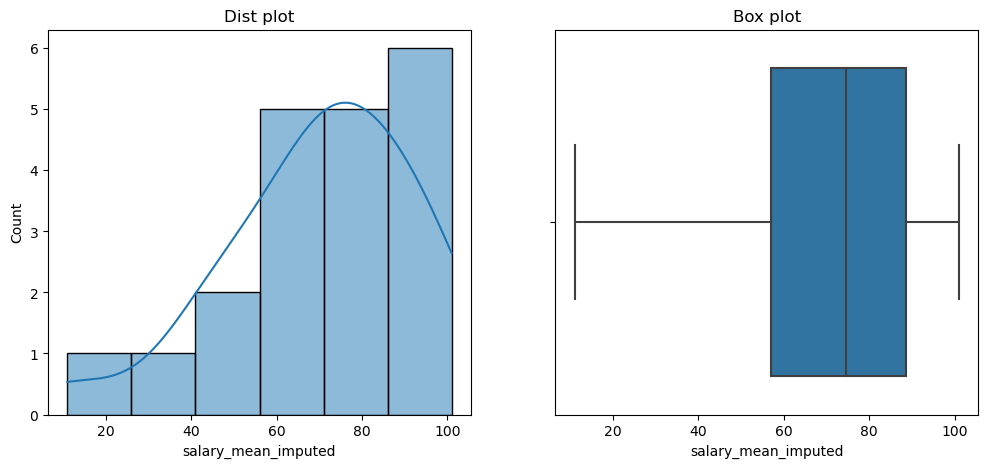

In [79]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_mean_imputed'],kde= True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_mean_imputed')
plt.title("Box plot")
plt.show()

In [80]:
#Capping >>> replacing with the outlier mwith the nearest value that is not outlier

In [81]:
lower_cap=df['salary'].quantile(0.05)
upper_cap=df['salary'].quantile(0.95)

In [82]:
lower_cap

38.550000000000004

In [83]:
upper_cap

111.50000000000003

In [84]:
df['salary_capped']=np.where(df['salary'] < lower_cap , lower_cap,
                             np.where (df['salary'] > upper_cap , upper_cap, df['salary']))

In [85]:
df

,salary,salary_mean_imputed,salary_capped
0,11,11.0,38.55
1,40,40.0,40.00
2,45,45.0,45.00
3,68,68.0,68.00
4,78,78.0,78.00
5,90,90.0,90.00
6,57,57.0,57.00
7,74,74.0,74.00
8,91,91.0,91.00
9,92,92.0,92.00


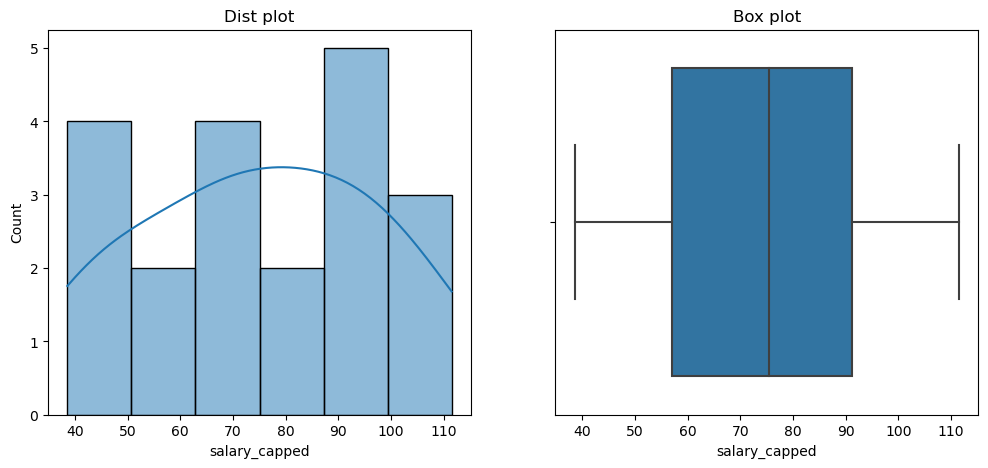

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary_capped"],kde= True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x="salary_capped")
plt.title("Box plot")
plt.show()